# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno: Jorge Augusto de Lima e Silva - Vitor Emanuel Ferreira Vital**
### **Matrícula: 2021032005 - 202103----**


### **Tema: Mineração de Padrões Frequentes em Dados Financeiros Intraday: Uma Análise Abrangente de Preços de Ações, Pares de Moedas e Criptomoedas**
### **Base de dados: Huge Stock Price Data: Intraday Minute Bar** (https://www.kaggle.com/datasets/arashnic/stock-data-intraday-minute-bar)


In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, shapiro
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**2. Data understanding (Entendimento dos dados)**


In [3]:
time_group = '15min' # intervalos de tempo que deverão ser considerados
drive_path = '/content/drive/MyDrive/tmp'
os.makedirs(drive_path)

In [4]:
try:
  oanda_data = pd.read_csv(drive_path + '/oanda_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  oanda_data = []
  instruments = ['AU200_AUD', 'AUD_JPY', 'AUD_USD', 'CORN_USD', 'DE10YB_EUR', 'EUR_JPY', 'EUR_USD', 'FR40_EUR', 'GBP_USD', 'JP225_USD', 'NAS100_USD', 'NATGAS_USD', 'SOYBN_USD', 'SPX500_USD',
                'SUGAR_USD', 'UK100_GBP', 'UK10YB_GBP', 'US2000_USD', 'USB02Y_USD', 'USB10Y_USD', 'USD_CAD', 'WHEAT_USD', 'WTICO_USD']

  for instrument in instruments:
    try:
      print('Loading: ', instrument)
      oanda_data.append(pyfinancialdata.get_multi_year(list(range(2005, 2021)), instrument, 'oanda', time_group=time_group))
      oanda_data[-1]['instrument'] = instrument
    except Exception as e:
      print(e)

  print('Loading:  NL25_EUR')
  oanda_data.append(pyfinancialdata.get_multi_year(list(range(2008, 2021)), 'NL25_EUR', 'oanda', time_group=time_group))
  oanda_data[-1]['instrument'] = 'NL25_EUR'

  print('Loading:  XAU_USD')
  oanda_data.append(pyfinancialdata.get_multi_year(list(range(2006, 2021)), 'XAU_USD', 'oanda', time_group=time_group))
  oanda_data[-1]['instrument'] = 'XAU_USD'

  oanda_data = pd.concat(oanda_data)
  oanda_data.to_csv(drive_path + '/oanda_data.csv.gz', index=True, compression='gzip')

print(oanda_data.shape)
oanda_data.head()

(7337074, 6)


,close,high,low,open,price,instrument
date,,,,,,
2005-01-03 22:45:00,4034.0,4035.9,4032.0,4034.0,4034.0,AU200_AUD
2005-01-03 23:00:00,4041.9,4043.9,4034.0,4035.9,4041.9,AU200_AUD
2005-01-03 23:15:00,4041.9,4043.9,4039.9,4039.9,4041.9,AU200_AUD
2005-01-03 23:30:00,4047.9,4049.9,4043.9,4043.9,4047.9,AU200_AUD
2005-01-03 23:45:00,4049.9,4049.9,4049.9,4049.9,4049.9,AU200_AUD


In [5]:
try:
  histdata_data = pd.read_csv(drive_path + '/histdata_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  histdata_data = []
  instruments = ['ETXEUR', 'GRXEUR', 'JPXJPY', 'SPXUSD']

  for instrument in instruments:
    try:
      print('Loading: ', instrument)
      histdata_data.append(pyfinancialdata.get_multi_year(list(range(2010, 2019)), instrument, 'histdata', time_group=time_group))
      histdata_data[-1]['instrument'] = instrument
    except Exception as e:
      print(e)

  histdata_data = pd.concat(histdata_data)
  histdata_data.to_csv(drive_path + '/histdata_data.csv.gz', index=True, compression='gzip')

print(histdata_data.shape)
histdata_data.head()

(610815, 6)


,close,high,low,open,price,instrument
date,,,,,,
2010-11-15 02:00:00,2810.0,2810.0,2803.0,2805.0,2810.0,ETXEUR
2010-11-15 02:15:00,2808.0,2809.0,2808.0,2809.0,2808.0,ETXEUR
2010-11-15 02:30:00,2806.0,2807.0,2805.0,2807.0,2806.0,ETXEUR
2010-11-15 02:45:00,2803.0,2806.0,2803.0,2805.0,2803.0,ETXEUR
2010-11-15 03:00:00,2799.0,2807.0,2797.0,2802.0,2799.0,ETXEUR


In [6]:
try:
  criptocurrency_data = pd.read_csv(drive_path + '/criptocurrency_data.csv.gz', index_col='date', compression='gzip')
except:

  try:
    import pyfinancialdata
  except:
    !pip3 install https://github.com/FutureSharks/financial-data/archive/master.zip
    import pyfinancialdata

  criptocurrency_data = []
  print('Loading:  BTC_USD')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2012, 2019)), 'BTC_USD', 'bitstamp', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'BTC_USD'
  print('Loading:  BTC_EUR')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2018, 2019)), 'BTC_EUR', 'kraken', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'BTC_EUR'
  print('Loading:  ETH_EUR')
  criptocurrency_data.append(pyfinancialdata.get_multi_year(list(range(2018, 2019)), 'ETH_EUR', 'kraken', time_group=time_group))
  criptocurrency_data[-1]['instrument'] = 'ETH_EUR'

  criptocurrency_data = pd.concat(criptocurrency_data)
  criptocurrency_data.to_csv(drive_path + '/criptocurrency_data.csv.gz', index=True, compression='gzip')

print(criptocurrency_data.shape)
criptocurrency_data.head()

(270122, 6)


,close,high,low,open,price,instrument
date,,,,,,
2012-01-01 00:00:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:15:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:30:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 00:45:00,4.58,4.58,4.58,4.58,4.58,BTC_USD
2012-01-01 01:00:00,4.58,4.58,4.58,4.58,4.58,BTC_USD


In [7]:
full_data = pd.concat([oanda_data, histdata_data, criptocurrency_data])
full_data['variation'] = full_data['close']/full_data['open']
print(full_data.shape)
full_data.head()

(8218011, 7)


,close,high,low,open,price,instrument,variation
date,,,,,,,
2005-01-03 22:45:00,4034.0,4035.9,4032.0,4034.0,4034.0,AU200_AUD,1.000000
2005-01-03 23:00:00,4041.9,4043.9,4034.0,4035.9,4041.9,AU200_AUD,1.001487
2005-01-03 23:15:00,4041.9,4043.9,4039.9,4039.9,4041.9,AU200_AUD,1.000495
2005-01-03 23:30:00,4047.9,4049.9,4043.9,4043.9,4047.9,AU200_AUD,1.000989
2005-01-03 23:45:00,4049.9,4049.9,4049.9,4049.9,4049.9,AU200_AUD,1.000000


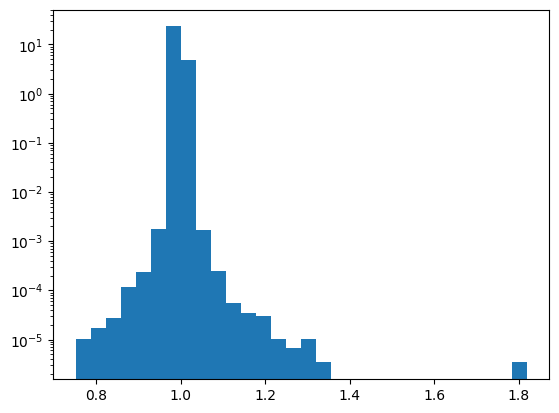

In [8]:
plt.hist(full_data['variation'], log=True, density=True, bins=30)
plt.show()

In [20]:
full_data['bins'] = pd.qcut(full_data['variation'], q=26, duplicates='drop')
print(len(full_data['bins'].cat.categories))
label_mapping = {label: chr(65 + i) for i, label in enumerate(full_data['bins'].cat.categories)}
full_data['bins'] = full_data['bins'].map(label_mapping)
full_data.head()

24


,close,high,low,open,price,instrument,variation,bins
date,,,,,,,,
2005-01-03 22:45:00,4034.0,4035.9,4032.0,4034.0,4034.0,AU200_AUD,1.000000,L
2005-01-03 23:00:00,4041.9,4043.9,4034.0,4035.9,4041.9,AU200_AUD,1.001487,W
2005-01-03 23:15:00,4041.9,4043.9,4039.9,4039.9,4041.9,AU200_AUD,1.000495,S
2005-01-03 23:30:00,4047.9,4049.9,4043.9,4043.9,4047.9,AU200_AUD,1.000989,V
2005-01-03 23:45:00,4049.9,4049.9,4049.9,4049.9,4049.9,AU200_AUD,1.000000,L


##**3. Data preparation (Preparação dos dados)**

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.